<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Introduction_to_Classification_Problems_in_Healthcare_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Confusion Matrix:
[[   0   21]
 [   0 2979]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.99      1.00      1.00      2979

    accuracy                           0.99      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.99      0.99      0.99      3000


Accuracy Score: 0.9930


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-1-647a0b6fbe27>:83: UserWarning: c

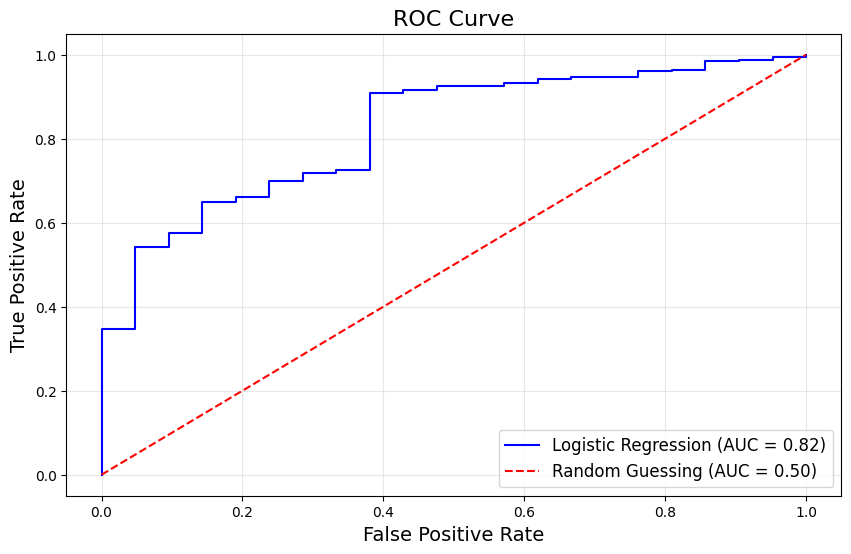

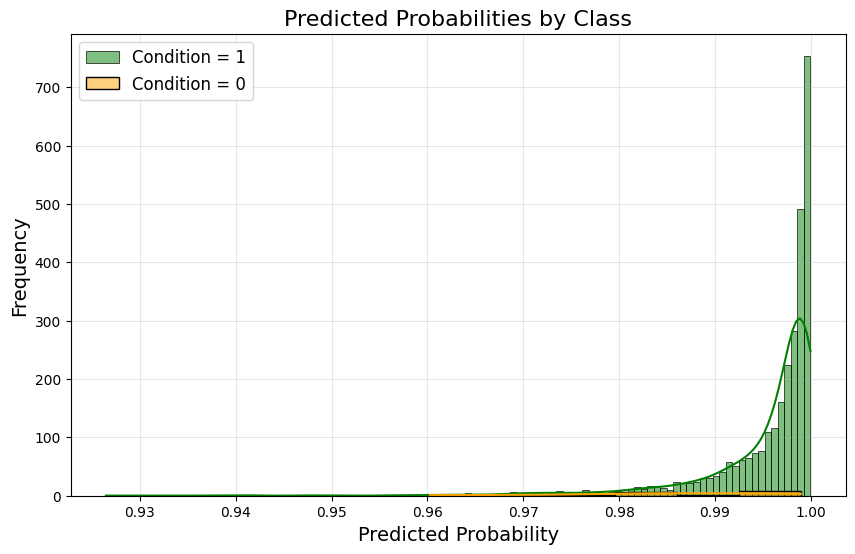

In [1]:
# Importing necessary libraries to handle data and implement classification models
# I deliberately chose these libraries because they provide advanced functionality for data analysis, visualization, and machine learning.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    accuracy_score,
)
from sklearn.preprocessing import StandardScaler

# Setting a random seed to ensure reproducibility of results
# I find this step crucial because it allows me to replicate my work and validate my findings over multiple iterations.
np.random.seed(42)

# Simulating a healthcare dataset for binary classification
# This dataset will mimic a scenario where I predict the likelihood of a patient having a certain condition based on clinical and demographic features.
n_samples = 10000
age = np.random.randint(18, 90, size=n_samples)  # Simulating patient ages
income = np.random.uniform(20000, 150000, size=n_samples)  # Annual income as a socioeconomic indicator
cholesterol = np.random.uniform(150, 300, size=n_samples)  # Cholesterol level as a clinical feature
bmi = np.random.uniform(18, 40, size=n_samples)  # Body Mass Index, a common health metric

# Simulating a binary response variable based on a logistic model
# I want this response variable to represent the presence (1) or absence (0) of a condition.
# I’m adding a probabilistic element to the response to reflect real-world variability in outcomes.
probability = (
    1 / (1 + np.exp(-(-0.02 * age + 0.05 * bmi + 0.03 * cholesterol - 0.00001 * income)))
)
condition = np.random.binomial(1, probability, size=n_samples)  # Binary outcome (0 or 1)

# Constructing the dataset as a DataFrame for easier manipulation
# I chose this format because it integrates seamlessly with both pandas and machine learning libraries.
data = pd.DataFrame(
    {"Age": age, "Income": income, "Cholesterol": cholesterol, "BMI": bmi, "Condition": condition}
)

# Splitting the data into training and testing sets
# I want to evaluate my model’s performance on unseen data to ensure its generalizability.
X = data[["Age", "Income", "Cholesterol", "BMI"]]
y = data["Condition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the features to standardize their ranges
# This step is essential because models like logistic regression can be sensitive to feature scales.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the logistic regression model
# I chose logistic regression for its simplicity and interpretability, making it ideal for binary classification tasks.
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Making predictions on the test set
# I find this step rewarding because it reveals how well my model has learned from the data.
y_pred = logreg.predict(X_test_scaled)
y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluating the model's performance
# I like to use multiple metrics to get a well-rounded view of how well my model is performing.
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred):.4f}")

# Plotting the ROC curve to visualize the model's ability to distinguish between classes
# I find this visualization particularly helpful in understanding the trade-off between sensitivity and specificity.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random Guessing (AUC = 0.50)", color="red")
plt.title("ROC Curve", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Visualizing the distribution of probabilities assigned by the model
# This allows me to see how well-separated the predicted probabilities are for the two classes.
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_prob[y_test == 1], color="green", kde=True, label="Condition = 1")
sns.histplot(y_pred_prob[y_test == 0], color="orange", kde=True, label="Condition = 0")
plt.title("Predicted Probabilities by Class", fontsize=16)
plt.xlabel("Predicted Probability", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()




